#### Instructions
Reproducing Gapminder map with Pandas and Matplotlib / Seaborn

The viz must inlcude :
- on the X axis, GDP per cap on a logatrythmic scale
- on the Y axis, Life expectancy
- Size of the bubbles must be proportionate to number of inhabitants
- Country from a same region will be represented by one colour. 4 regions : Americas, Africa, Asia, Europe

Modify the default fonts, and include the compass images and the map
Modify the labels alignement. 
Add at least the name of the 50 countries with the most inhabitants.

<b>Option:</b>
- Add the name of more countries on the map
- Collect new data and complete the vizualisation with further analysis.


### Let's go

In [1]:
import os
os.getcwd()

'c:\\Users\\aly\\Documents\\PROJET_PRO\\TRAINING\\1-PORTFOLIO\\Content\\Gapminder world map'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox, AnchoredOffsetbox, OffsetBox

from matplotlib import font_manager as fm

sns.set_style("white")

#### The data we've got

In [3]:
# Python dict given gathering all data to build the Gapminder
gapminder_data = {
      'country_name': 
            ['Seychelles', 'Antigua and Barbuda', 'Vietnam', 'Congo, Dem. Rep.', 'Fiji', 'United Arab Emirates', 'Tajikistan', 'Hungary', 'Belarus', 'Papua New Guinea', 'Austria', 'Comoros', 'Iran', 'Turkey', 'Germany', 'Serbia', 'Israel', 'Switzerland', 'Togo', 'Sierra Leone', 'Guyana', 'Bhutan', 'Thailand', 'Solomon Islands', 'Hong Kong, China', 'Lao', 'Paraguay', 'United Kingdom', 'France', 'Luxembourg', 'Montenegro', 'Tanzania', 'South Africa', 'Italy', 'Bulgaria', 'Libya', 'Nicaragua', 'Lebanon', 'Kyrgyz Republic', 'El Salvador', 'Turkmenistan', 'Suriname', 'Cape Verde', 'Kenya', 'Maldives', 'Myanmar', 'South Korea', 'Colombia', 'Singapore', 'Denmark', 'Congo, Rep.', 'Finland', 'Norway', 'Slovak Republic', 'Palestine', 'Oman', 'Liberia', 'Costa Rica', 'Uganda', 'Spain', 'Argentina', 'Malta', 'Brunei', 'Sudan', 'Algeria', 'Ukraine', 'Iraq', 'Belize', 'Ireland', 'Central African Republic', 'New Zealand', 'Mauritania', 'Panama', 'Kuwait', 'Croatia', 'Moldova', 'Bahamas', 'Afghanistan', 'Canada', 'Poland', 'Morocco', 'Saudi Arabia', 'Iceland', 'United States', 'Angola', 'Uzbekistan', 'Peru', 'Malaysia', 'Mozambique', 'Vanuatu', 'Ghana', 'Yemen', 'Georgia', 'Eritrea', 'Uruguay', 'Mongolia', 'Bosnia and Herzegovina', 'Nepal', 'Barbados', 'Venezuela', 'Madagascar', 'Indonesia', 'Cameroon', "Cote d'Ivoire", 'North Korea', 'Australia', 'Niger', 'Taiwan', 'Pakistan', 'Sao Tome and Principe', 'Brazil', 'Nigeria', 'Sri Lanka', 'Burkina Faso', 'Samoa', 'Mali', 'Armenia', 'Jamaica', 'Qatar', 'Albania', 'Lithuania', 'Namibia', 'Botswana', 'Gambia', 'Gabon', 'Lesotho', 'Slovenia', 'North Macedonia', 'Guinea-Bissau', 'Djibouti', 'Kazakhstan', 'Malawi', 'Chile', 'Romania', 'St. Lucia', 'Zambia', 'Syria', 'Guatemala', 'Ecuador', 'Netherlands', 'Senegal', 'Bangladesh', 'Chad', 'Cambodia', 'Somalia', 'Zimbabwe', 'Russia', 'Mexico', 'Guinea', 'Rwanda', 'Japan', 'Kiribati', 'Benin', 'Burundi', 'Dominican Republic', 'Ethiopia', 'Micronesia, Fed. Sts.', 'Grenada', 'St. Vincent and the Grenadines', 'Philippines', 'Tunisia', 'Bolivia', 'Belgium', 'Haiti', 'South Sudan', 'Cuba', 'Tonga', 'Egypt', 'Czech Republic', 'Greece', 'Jordan', 'Azerbaijan', 'Portugal', 'Sweden', 'Honduras', 'Latvia', 'Bahrain', 'Trinidad and Tobago', 'Equatorial Guinea', 'China', 'India', 'Timor-Leste', 'Estonia', 'Mauritius', 'Cyprus', 'Eswatini'],
      'continent_code': 
            ['AF', 'AM', 'AS', 'AF', 'AS', 'AS', 'AS', 'EU', 'EU', 'AS', 'EU', 'AF', 'AS', 'AS', 'EU', 'EU', 'AS', 'EU', 'AF', 'AF', 'AM', 'AS', 'AS', 'AS', 'AS', 'AS', 'AM', 'EU', 'EU', 'EU', 'EU', 'AF', 'AF', 'EU', 'EU', 'AF', 'AM', 'AS', 'AS', 'AM', 'AS', 'AM', 'AF', 'AF', 'AS', 'AS', 'AS', 'AM', 'AS', 'EU', 'AF', 'EU', 'EU', 'EU', 'AS', 'AS', 'AF', 'AM', 'AF', 'EU', 'AM', 'EU', 'AS', 'AF', 'AF', 'EU', 'AS', 'AM', 'EU', 'AF', 'AS', 'AF', 'AM', 'AS', 'EU', 'EU', 'AM', 'AS', 'AM', 'EU', 'AF', 'AS', 'EU', 'AM', 'AF', 'AS', 'AM', 'AS', 'AF', 'AS', 'AF', 'AS', 'AS', 'AF', 'AM', 'AS', 'EU', 'AS', 'AM', 'AM', 'AF', 'AS', 'AF', 'AF', 'AS', 'AS', 'AF', 'AS', 'AS', 'AF', 'AM', 'AF', 'AS', 'AF', 'AS', 'AF', 'AS', 'AM', 'AS', 'EU', 'EU', 'AF', 'AF', 'AF', 'AF', 'AF', 'EU', 'EU', 'AF', 'AF', 'AS', 'AF', 'AM', 'EU', 'AM', 'AF', 'AS', 'AM', 'AM', 'EU', 'AF', 'AS', 'AF', 'AS', 'AF', 'AF', 'EU', 'AM', 'AF', 'AF', 'AS', 'AS', 'AF', 'AF', 'AM', 'AF', 'AS', 'AM', 'AM', 'AS', 'AF', 'AM', 'EU', 'AM', 'AF', 'AM', 'AS', 'AF', 'EU', 'EU', 'AS', 'AS', 'EU', 'EU', 'AM', 'EU', 'AS', 'AM', 'AF', 'AS', 'AS', 'AS', 'EU', 'AF', 'AS', 'AF'],
      'gdp_per_cap': #valeur du PIB par habitant pour chaque pays
            [25300, 17100, 8650, 1070, 11500, 61300, 3570, 32400, 19100, 4160, 53600, 2890, 12600, 29800, 52900, 19200, 39700, 67400, 1590, 1660, 14100, 11300, 17700, 2480, 58600, 7920, 12700, 43900, 44600, 113000, 19900, 2600, 11600, 40400, 23600, 13800, 5240, 10000, 4920, 8280, 16000, 14100, 6370, 4450, 15200, 4770, 43900, 14000, 94600, 57100, 3230, 48400, 66200, 31600, 5580, 26300, 1370, 19400, 2140, 38800, 20600, 40200, 63600, 3640, 10700, 12900, 9310, 5850, 90900, 943, 42900, 5020, 28100, 43600, 27800, 13100, 31000, 1950, 47600, 33500, 7160, 44500, 51900, 63500, 6060, 7200, 12100, 27800, 1240, 2800, 5510, 2370, 14600, 1550, 20800, 11800, 14800, 3360, 13300, 5290, 1550, 11800, 3480, 5370, 1670, 50100, 1230, 57000, 4570, 3650, 14400, 4920, 13000, 2160, 5720, 2230, 12700, 8870, 89400, 13900, 38100, 8660, 16800, 2220, 14500, 2620, 37800, 16500, 1920, 5440, 25800, 1030, 24300, 30700, 12800, 3170, 3980, 8540, 10500, 56000, 3410, 5030, 1500, 4340, 673, 2590, 27200, 18700, 2710, 2250, 41200, 2230, 3330, 719, 17800, 2330, 3300, 14400, 11900, 8370, 9980, 8250, 50100, 2760, 1800, 10200, 6210, 12000, 39900, 29200, 9830, 13800, 33600, 51300, 5320, 31300, 42300, 24400, 17000, 17700, 6820, 2900, 37000, 20500, 37800, 8270],
      'life_expectancy': # Avg number of years a newborn child would live if current mortality patterns were to stay the same
            [73.7, 76.5, 74.7, 65.7, 68.6, 74.2, 70.0, 76.9, 74.3, 65.1, 82.4, 69.2, 78.2, 78.9, 81.5, 76.0, 83.3, 84.3, 65.7, 62.6, 67.5, 73.8, 78.8, 59.4, 84.7, 69.6, 76.8, 81.3, 83.1, 83.2, 76.1, 67.9, 65.6, 83.4, 73.6, 76.3, 75.8, 76.8, 73.7, 76.2, 71.1, 73.0, 74.1, 67.0, 79.6, 69.9, 83.2, 80.5, 85.1, 81.4, 65.9, 82.2, 83.2, 77.8, 75.1, 74.4, 66.7, 80.5, 66.9, 83.3, 76.9, 82.9, 74.6, 71.0, 76.6, 74.1, 73.6, 74.7, 82.3, 53.1, 82.1, 71.2, 80.4, 81.7, 79.0, 74.6, 73.6, 64.0, 82.5, 78.4, 73.8, 74.8, 84.4, 79.0, 65.8, 68.7, 80.7, 75.3, 59.3, 65.7, 66.9, 67.9, 73.7, 64.5, 77.8, 68.5, 77.3, 71.6, 76.4, 75.1, 66.2, 71.8, 64.0, 64.9, 73.5, 83.2, 63.2, 80.6, 66.2, 71.3, 76.3, 65.1, 77.6, 62.5, 70.7, 62.6, 76.0, 76.5, 76.5, 78.7, 76.5, 65.9, 62.5, 67.5, 68.2, 52.6, 81.7, 74.6, 61.6, 67.5, 72.3, 65.6, 80.5, 75.8, 75.4, 63.8, 75.8, 73.0, 76.8, 82.0, 69.0, 75.1, 61.0, 70.3, 59.1, 61.5, 73.3, 75.8, 61.9, 69.2, 85.1, 61.2, 65.1, 64.5, 73.5, 69.6, 64.3, 73.4, 73.2, 72.1, 78.1, 72.5, 81.7, 64.4, 64.3, 78.9, 73.2, 71.3, 79.7, 81.3, 78.5, 71.2, 82.1, 83.1, 72.4, 76.1, 77.3, 75.1, 66.7, 78.0, 71.2, 71.0, 78.3, 75.8, 81.1, 59.1],
      'total_population': 
            [98900, 98700, 98200000, 92400000, 903000, 9990000, 9750000, 9630000, 9440000, 9120000, 9040000, 888000, 85000000, 85000000, 83900000, 8700000, 8790000, 8720000, 8480000, 8140000, 790000, 780000, 70000000, 704000, 7550000, 7380000, 7220000, 68200000, 65400000, 635000, 628000, 61500000, 60000000, 60400000, 6900000, 6960000, 6700000, 6770000, 6630000, 6520000, 6120000, 592000, 562000, 55000000, 544000, 54800000, 51300000, 51300000, 5900000, 5810000, 5660000, 5550000, 5470000, 5460000, 5220000, 5220000, 5180000, 5140000, 47100000, 46700000, 45600000, 443000, 442000, 44900000, 44600000, 43500000, 41200000, 405000, 4980000, 4920000, 4860000, 4780000, 4380000, 4330000, 4080000, 4019999, 397000, 39800000, 38100000, 37800000, 37300000, 35300000, 343000, 333000000, 33900000, 33900000, 33400000, 32799999, 32200000, 314000, 31700000, 30500000, 3980000, 3600000, 3490000, 3330000, 3260000, 29700000, 288000, 28700000, 28400000, 276000000, 27200000, 27100000, 25900000, 25800000, 25100000, 23900000, 225000000, 223000, 214000000, 211000000, 21500000, 21500000, 200000, 20900000, 2970000, 2970000, 2930000, 2870000, 2690000, 2590000, 2400000, 2490000, 2280000, 2160000, 2080000, 2080000, 2020000, 1000000, 19000000, 19600000, 19200000, 19100000, 184000, 18900000, 18300000, 18200000, 17900000, 17200000, 17200000, 166000000, 16900000, 16900000, 16399999, 15100000, 146000000, 130000000, 13500000, 13300000, 126000000, 121000, 12500000, 12300000, 11000000, 118000000, 116000, 113000, 111000, 111000000, 11900000, 11800000, 11600000, 11500000, 11400000, 11300000, 107000, 104000000, 10700000, 10400000, 10300000, 10200000, 10200000, 10200000, 10100000, 1870000, 1750000, 1400000, 1450000, 1440000000, 1390000000, 1340000, 1330000, 1270000, 1220000, 1170000],
      'bubble_color_hex': # colors for Bubble chart - one color per continent
            ['#00d6e9', '#80eb00', '#ff5872', '#00d6e9', '#ff5872', '#ff5872', '#ff5872', '#ffe700', '#ffe700', '#ff5872', '#ffe700', '#00d6e9', '#ff5872', '#ff5872', '#ffe700', '#ffe700', '#ff5872', '#ffe700', '#00d6e9', '#00d6e9', '#80eb00', '#ff5872', '#ff5872', '#ff5872', '#ff5872', '#ff5872', '#80eb00', '#ffe700', '#ffe700', '#ffe700', '#ffe700', '#00d6e9', '#00d6e9', '#ffe700', '#ffe700', '#00d6e9', '#80eb00', '#ff5872', '#ff5872', '#80eb00', '#ff5872', '#80eb00', '#00d6e9', '#00d6e9', '#ff5872', '#ff5872', '#ff5872', '#80eb00', '#ff5872', '#ffe700', '#00d6e9', '#ffe700', '#ffe700', '#ffe700', '#ff5872', '#ff5872', '#00d6e9', '#80eb00', '#00d6e9', '#ffe700', '#80eb00', '#ffe700', '#ff5872', '#00d6e9', '#00d6e9', '#ffe700', '#ff5872', '#80eb00', '#ffe700', '#00d6e9', '#ff5872', '#00d6e9', '#80eb00', '#ff5872', '#ffe700', '#ffe700', '#80eb00', '#ff5872', '#80eb00', '#ffe700', '#00d6e9', '#ff5872', '#ffe700', '#80eb00', '#00d6e9', '#ff5872', '#80eb00', '#ff5872', '#00d6e9', '#ff5872', '#00d6e9', '#ff5872', '#ff5872', '#00d6e9', '#80eb00', '#ff5872', '#ffe700', '#ff5872', '#80eb00', '#80eb00', '#00d6e9', '#ff5872', '#00d6e9', '#00d6e9', '#ff5872', '#ff5872', '#00d6e9', '#ff5872', '#ff5872', '#00d6e9', '#80eb00', '#00d6e9', '#ff5872', '#00d6e9', '#ff5872', '#00d6e9', '#ff5872', '#80eb00', '#ff5872', '#ffe700', '#ffe700', '#00d6e9', '#00d6e9', '#00d6e9', '#00d6e9', '#00d6e9', '#ffe700', '#ffe700', '#00d6e9', '#00d6e9', '#ff5872', '#00d6e9', '#80eb00', '#ffe700', '#80eb00', '#00d6e9', '#ff5872', '#80eb00', '#80eb00', '#ffe700', '#00d6e9', '#ff5872', '#00d6e9', '#ff5872', '#00d6e9', '#00d6e9', '#ffe700', '#80eb00', '#00d6e9', '#00d6e9', '#ff5872', '#ff5872', '#00d6e9', '#00d6e9', '#80eb00', '#00d6e9', '#ff5872', '#80eb00', '#80eb00', '#ff5872', '#00d6e9', '#80eb00', '#ffe700', '#80eb00', '#00d6e9', '#80eb00', '#ff5872', '#00d6e9', '#ffe700', '#ffe700', '#ff5872', '#ff5872', '#ffe700', '#ffe700', '#80eb00', '#ffe700', '#ff5872', '#80eb00', '#00d6e9', '#ff5872', '#ff5872', '#ff5872', '#ffe700', '#00d6e9', '#ff5872', '#00d6e9'],
      'egdecolor_bubble': # colors for Bubble chart border - one color per continent
            ['#015c63', '#345b04', '#7c0012', '#015c63', '#7c0012', '#7c0012', '#7c0012', '#5e5500', '#5e5500', '#7c0012', '#5e5500', '#015c63', '#7c0012', '#7c0012', '#5e5500', '#5e5500', '#7c0012', '#5e5500', '#015c63', '#015c63', '#345b04', '#7c0012', '#7c0012', '#7c0012', '#7c0012', '#7c0012', '#345b04', '#5e5500', '#5e5500', '#5e5500', '#5e5500', '#015c63', '#015c63', '#5e5500', '#5e5500', '#015c63', '#345b04', '#7c0012', '#7c0012', '#345b04', '#7c0012', '#345b04', '#015c63', '#015c63', '#7c0012', '#7c0012', '#7c0012', '#345b04', '#7c0012', '#5e5500', '#015c63', '#5e5500', '#5e5500', '#5e5500', '#7c0012', '#7c0012', '#015c63', '#345b04', '#015c63', '#5e5500', '#345b04', '#5e5500', '#7c0012', '#015c63', '#015c63', '#5e5500', '#7c0012', '#345b04', '#5e5500', '#015c63', '#7c0012', '#015c63', '#345b04', '#7c0012', '#5e5500', '#5e5500', '#345b04', '#7c0012', '#345b04', '#5e5500', '#015c63', '#7c0012', '#5e5500', '#345b04', '#015c63', '#7c0012', '#345b04', '#7c0012', '#015c63', '#7c0012', '#015c63', '#7c0012', '#7c0012', '#015c63', '#345b04', '#7c0012', '#5e5500', '#7c0012', '#345b04', '#345b04', '#015c63', '#7c0012', '#015c63', '#015c63', '#7c0012', '#7c0012', '#015c63', '#7c0012', '#7c0012', '#015c63', '#345b04', '#015c63', '#7c0012', '#015c63', '#7c0012', '#015c63', '#7c0012', '#345b04', '#7c0012', '#5e5500', '#5e5500', '#015c63', '#015c63', '#015c63', '#015c63', '#015c63', '#5e5500', '#5e5500', '#015c63', '#015c63', '#7c0012', '#015c63', '#345b04', '#5e5500', '#345b04', '#015c63', '#7c0012', '#345b04', '#345b04', '#5e5500', '#015c63', '#7c0012', '#015c63', '#7c0012', '#015c63', '#015c63', '#5e5500', '#345b04', '#015c63', '#015c63', '#7c0012', '#7c0012', '#015c63', '#015c63', '#345b04', '#015c63', '#7c0012', '#345b04', '#345b04', '#7c0012', '#015c63', '#345b04', '#5e5500', '#345b04', '#015c63', '#345b04', '#7c0012', '#015c63', '#5e5500', '#5e5500', '#7c0012', '#7c0012', '#5e5500', '#5e5500', '#345b04', '#5e5500', '#7c0012', '#345b04', '#015c63', '#7c0012', '#7c0012', '#7c0012', '#5e5500', '#015c63', '#7c0012', '#015c63']
            }

In [4]:
# Converting the dict into df
gapminder_df = pd.DataFrame.from_dict(gapminder_data, orient = 'columns')
gapminder_df

,country_name,continent_code,gdp_per_cap,life_expectancy,total_population,bubble_color_hex,egdecolor_bubble
0,Seychelles,AF,25300,73.7,98900,#00d6e9,#015c63
1,Antigua and Barbuda,AM,17100,76.5,98700,#80eb00,#345b04
2,Vietnam,AS,8650,74.7,98200000,#ff5872,#7c0012
3,"Congo, Dem. Rep.",AF,1070,65.7,92400000,#00d6e9,#015c63
4,Fiji,AS,11500,68.6,903000,#ff5872,#7c0012
...,...,...,...,...,...,...,...
181,Timor-Leste,AS,2900,71.0,1340000,#ff5872,#7c0012
182,Estonia,EU,37000,78.3,1330000,#ffe700,#5e5500
183,Mauritius,AF,20500,75.8,1270000,#00d6e9,#015c63
184,Cyprus,AS,37800,81.1,1220000,#ff5872,#7c0012


In [8]:
# Countries name data and postions to be added to the visualization (the first 50 in terms of total population)
countries_labels_dict = {
    'xaxis_values': [12900, 5520, 40500, 8800, 2570, 10400, 4220, 3830, 27200, 17700, 34200, 1930, 6370, 10500, 6950, 770, 10600, \
                     23800, 52900, 17700, 23900, 46600, 2600, 40400, 11600, 4450, 4770, 14000, 26900, 1840, 32800, 20600, 3640 , \
                     10700, 12900, 9310, 1950, 47600, 33500, 5960, 44500, 6060, 7200, 11100, 27800, 1240, 5510, 1970, 3060, 4590],
    'yaxis_values': [82, 68.2, 76, 72.6, 66.2, 75.8, 62.7, 76.5, 73, 75.4, 85.1, 69.9, 71.1, 69.8, 74.7, 62.3, 78.2, 79.7, 81, 78.8, \
                     80.7, 83.1, 67.9, 83.9, 65.4, 67.5, 69.9, 80.5, 82.5, 66.9, 83.3, 76.9, 71, 77.2, 74.1, 73.9, 63.8, 82.3, 78.1, \
                     73.8, 74.6, 65.6, 67.7, 80.7, 75, 59.1, 66.9, 67.9, 71.6, 75.1],
    'countries_name': ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', \
                       'Mexico', 'Japan', 'Ethiopia', 'Philippines', 'Egypt', 'Vietnam', 'Congo, Dem.\nRep.', 'Iran', 'Turkey', \
                       'Germany', 'Thailand', 'United Kingdom', 'France', 'Tanzania', 'Italy', 'South Africa', 'Kenya', 'Myanmar', \
                       'Colombia', 'South Korea', 'Uganda', 'Spain', 'Argentina', 'Sudan', 'Algeria', 'Ukraine', 'Iraq', 'Afghanistan', \
                       'Canada', 'Poland', 'Morocco', 'Saudi Arabia', 'Angola', 'Uzbekistan', 'Peru', 'Malaysia', 'Mozambique', \
                       'Ghana', 'Yemen', 'Nepal', 'Venezuela'],
    'fontsizes': [40, 40, 25, 24, 23, 23, 20, 20, 20, 20, 19, 19, 18, 18, 18, 18, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, \
                  14, 14, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11]
}

In [9]:
countries_labels_df = pd.DataFrame.from_dict(countries_labels_dict, orient = 'columns')
countries_labels_df

,xaxis_values,yaxis_values,countries_name,fontsizes
0,12900,82.0,China,40
1,5520,68.2,India,40
2,40500,76.0,United States,25
3,8800,72.6,Indonesia,24
4,2570,66.2,Pakistan,23
5,10400,75.8,Brazil,23
6,4220,62.7,Nigeria,20
7,3830,76.5,Bangladesh,20
8,27200,73.0,Russia,20
9,17700,75.4,Mexico,20


In [11]:
# Set fonts 
prop_title = fm.FontProperties(fname='Fonts/Ubuntu-Medium.ttf')
prop_labels = fm.FontProperties(fname='Fonts/Ubuntu-Regular.ttf')
prop_countries_annot = fm.FontProperties(fname='Fonts/ArchitectsDaughter-Regular.ttf')

In [14]:
continent_colors = {'AS': '#ff5872', 
                    'AM': '#80eb00', 
                    'EU': '#ffe700', 
                    'AF': '#00d6e9'}

#### Reproducing the map

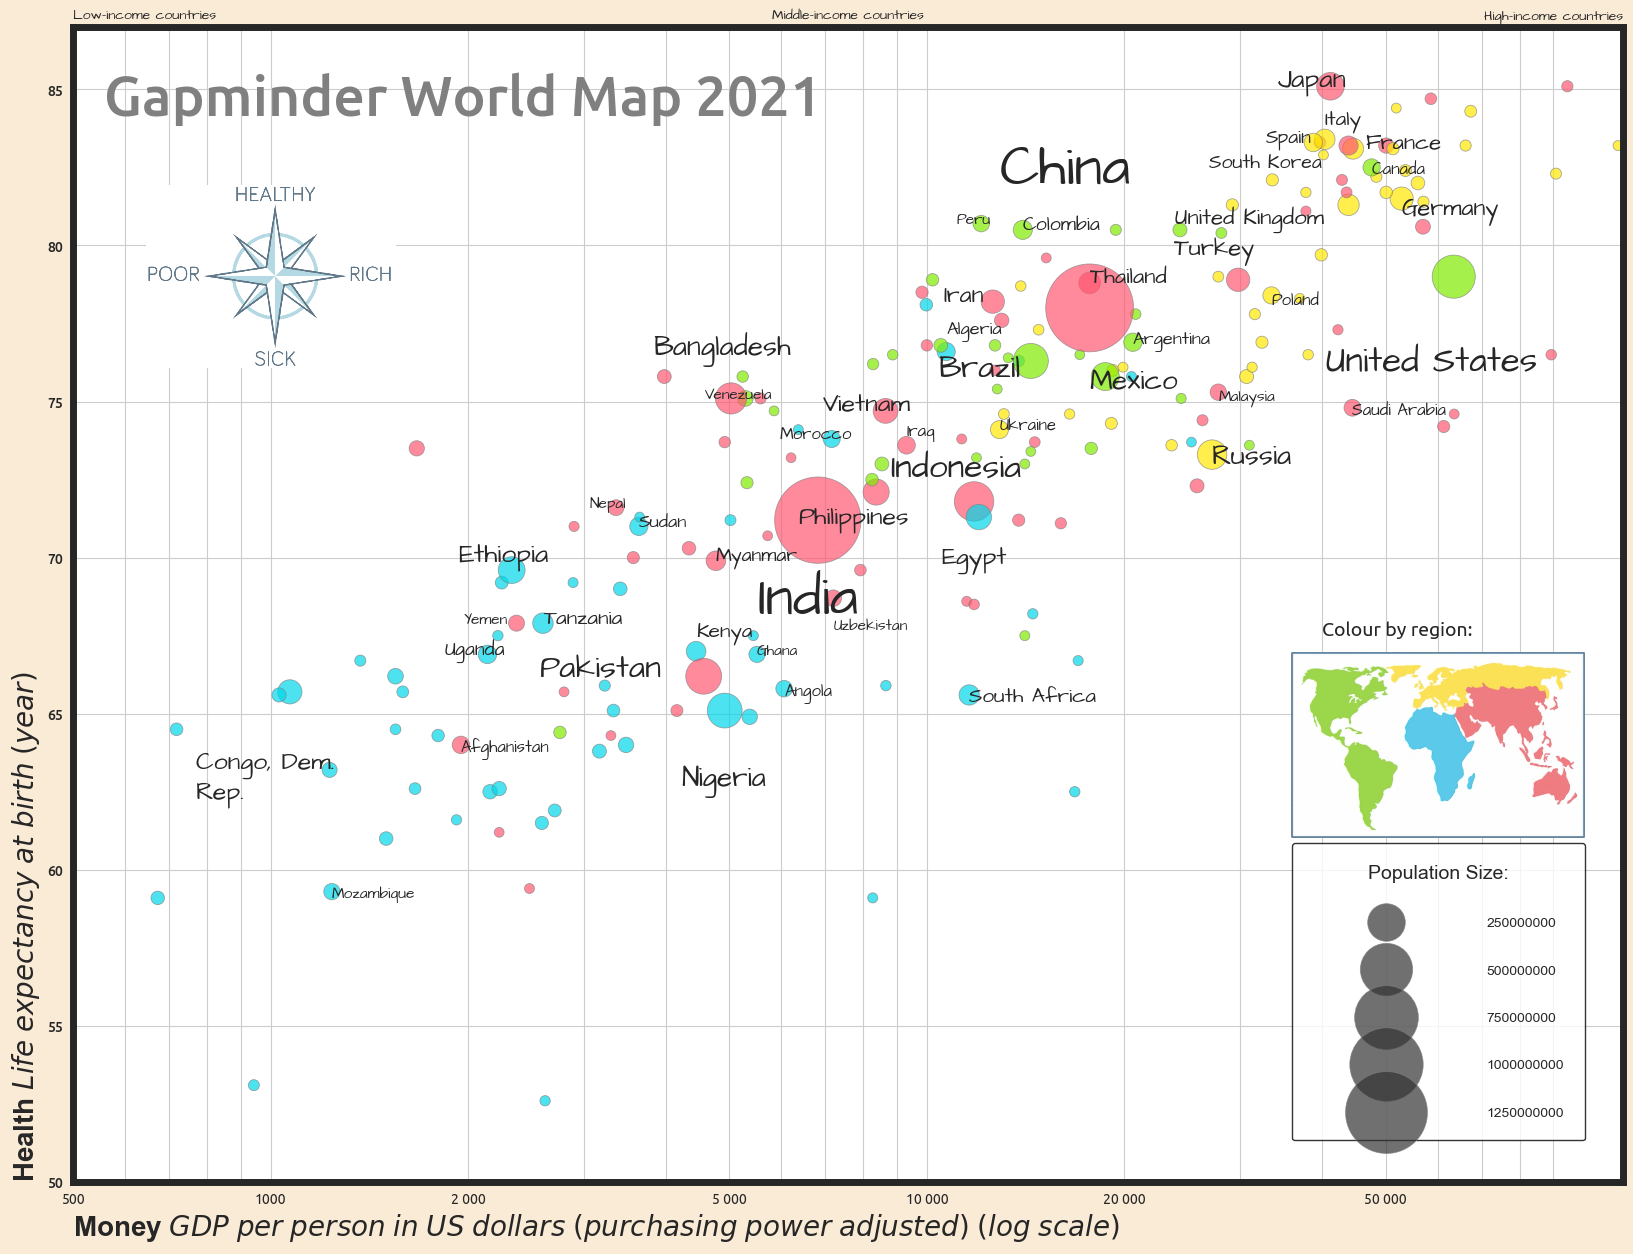

In [17]:
### Reproducing the map with Seaborn

# creating the figure and axis objects
fig, ax = plt.subplots(figsize =(20,15))

# Bubble chart visualization
sns.scatterplot(
    data = gapminder_df,  
    x = 'gdp_per_cap',
    y = 'life_expectancy',
    size = 'total_population',
    hue= 'continent_code', 
    palette= continent_colors,
    edgecolor ='grey',
    sizes=(50, 4000),       # pour ajuster la taille des bulles
    alpha=0.7 # transparency of the bubbles
    )

# Titles
fig.suptitle(x = 0.32, y = 0.85, t= 'Gapminder World Map 2021', fontsize = 40, color = 'grey', fontproperties = prop_title)
plt.title('Middle-income countries', fontsize= 20 , fontproperties = prop_countries_annot)
plt.title('Low-income countries', loc= 'left', fontsize= 20 ,fontproperties = prop_countries_annot)
plt.title('High-income countries', loc= 'right', fontsize= 20 ,fontproperties = prop_countries_annot)

# Setting up a logarithmic scale for x axis - Large variation of GDP so log scale essential
plt.xscale('log')
# Custom ticks and labels for x axis
plt.xlabel('Money $GDP$ $per$ $person$ $in$ $US$ $dollars$ $(purchasing$ $power$ $adjusted)$ $(log$ $scale)$', weight = 'bold', fontsize = 20, loc= 'left')
plt.xticks([500, 1000, 2000, 5000, 10000, 20000,50000],['500', '1000', '2 000', '5 000', '10 000', '20 000','50 000'], fontsize  = 20, fontproperties = prop_labels)
plt.xlim(500, 115000) # min, max values for x axis

# Custom ticks and labels for y axis
plt.ylabel('Health $Life$ $expectancy$ $at$ $birth$ $(year)$', weight = 'bold', fontsize = 20, loc = 'bottom') 
plt.yticks(fontsize=40, fontproperties = prop_title)
plt.ylim(50,87) # min, max values for y axis

# adding grid lines
plt.grid(axis = 'both', which = 'both')

# Name of the countries
for i in range(len(countries_labels_dict.get('countries_name'))):
   plt.text(countries_labels_dict.get('xaxis_values')[i], countries_labels_dict.get('yaxis_values')[i], countries_labels_dict.get('countries_name')[i], fontsize=countries_labels_dict.get('fontsizes')[i], fontproperties = prop_countries_annot)

## Adding compass and map legend images to the plot
 # Figure 1 - Compass
compass_rose = mpimg.imread('IMAGE-compasslarger.png')
 # offsetting compass image ie positioning the image on the plot
img_compass = OffsetImage(compass_rose, zoom = .3)
ab_compass = AnnotationBbox(img_compass, (1000, 79),zorder=1,frameon=False)
ax.add_artist(ab_compass)

 # Figure 2 - Map for legend
map_legend = mpimg.imread('IMAGE-map_legend.png')
 # Offsetting figure 2 - 
img_map = OffsetImage(map_legend,zoom = .15)
ab_map = AnnotationBbox(img_map, (60000, 64),zorder=1,frameon=False)
ax.add_artist(ab_map)
ax.text(40000, 67.5, "Colour by region:", fontsize = 14, fontproperties = prop_labels)

# Figure 3 - Bubble size legend
 # First, slecting only the relevant element to be displayed on the legend
handles, labels = ax.get_legend_handles_labels()
desired_handles = [handles[6], handles[7], handles[8], handles[9], handles[10]]
desired_labels = [labels[6], labels[7], labels[8], labels[9], labels[10]]

 # customizing the legend position for bubble sizes
legend_x, legend_y, legend_width, legend_height = 0.78, 0.03, 0.2, 0.4

 # Re-call legend with only the desired elements
ax.legend(
    handles =desired_handles, 
    labels = desired_labels, 
    loc='lower right', 
    bbox_to_anchor= (legend_x, legend_y, legend_width, legend_height),
    frameon = True,
    edgecolor='black',
    fontsize=10, 
    title_fontsize = 14,
    handlelength=10.5,     # Increase the length of the marker/line space
    borderpad=1.5,         # Increase padding around the legend box
    handletextpad=2,    # Increase space between marker and text
    markerscale=1,
    labelspacing=2.5,
    title='Population Size:')


# setting the background color
fig.patch.set_facecolor('antiquewhite')
# adding a ticker border to the plot
[x.set_linewidth(5) for x in ax.spines.values()]

plt.savefig('gapminder_2021-seaborn.png',bbox_inches='tight')
plt.show()

3- Modifier les polices par défaut (fichiers .ttf), intégrer les images fournies sur votre visualisation, modifier l'alignement des labels, adapter la grille, etc. Bref, Soyez créatifs !

4- Ajouter à minima le nom des 50 pays ayant le plus grand nomlbre d'habitants à votre visualisation (cf. code commenté ci-dessous)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5568487e-3caa-49b2-a3d0-0ce35d7214fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>